In [16]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

# Create our portfolio of equities
tickers = ['NTC','FIRSTSBANK','DUTCHBANGL','ARAMITCEM','OLYMPIC','POPULAR1MF',
           'RAKCERAMIC','CONTININS','PRIMEBANK','ORIONPHARM','SONARBAINS',
           'UNITEDAIR','AMCL(PRAN)','KPCL','FBFIF']

# Set the investment weights
min_var_w = [0.087383,0.054382,0.134624,0.003188,0.136811,0.081247,0.041256,
             0.022097,0.078286,0.033067,0.027110,0.027530,0.104507,0.130760,
             0.037752]

sharpe_w = [0.028041,0.159937,0.072409,0.007953,0.182281,0.106609,0.041597,
            0.009546,0.140857,0.017439,0.013381,0.003557,0.138987,0.074912,
            0.002496]

equal_w = [0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,
           0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,
           0.066667,]

weights = np.array(sharpe_w)

# Set an initial investment level
initial_investment = 1000000

# getting closed prices
ticks = tickers.copy()
ticks.append('Date')

df = pd.read_csv("Combined_Data.csv")
data = df[ticks].copy()
data.set_index('Date', inplace=True)

#From the closing prices, calculate periodic returns
returns = data.pct_change()

returns.tail()

,NTC,FIRSTSBANK,DUTCHBANGL,ARAMITCEM,OLYMPIC,POPULAR1MF,RAKCERAMIC,CONTININS,PRIMEBANK,ORIONPHARM,SONARBAINS,UNITEDAIR,AMCL(PRAN),KPCL,FBFIF
Date,,,,,,,,,,,,,,,
2017-12-21,-0.002710,-0.006536,-0.013717,0.006579,-0.000362,0.000000,0.004975,0.008511,0.000000,0.016632,-0.026316,-0.018182,0.009379,-0.003454,0.000000
2017-12-24,-0.006875,-0.013158,-0.020530,-0.058824,-0.001812,-0.015873,-0.008251,0.008439,-0.003717,-0.014315,-0.016216,0.000000,-0.006195,-0.005199,-0.017241
2017-12-26,-0.007888,0.006667,-0.005409,-0.020833,-0.002178,0.000000,0.008319,-0.050209,0.007463,-0.004149,0.000000,0.018519,0.000890,0.000000,0.000000
2017-12-27,-0.005517,0.006623,0.000000,0.074468,0.069844,0.000000,-0.006601,-0.017621,0.011111,-0.006250,0.000000,-0.018182,-0.016904,-0.003484,0.000000
2017-12-28,0.001632,0.006579,0.040789,0.000000,-0.019721,0.000000,-0.004983,0.000000,0.003663,0.020964,0.010989,0.037037,0.004525,0.022727,0.000000


In [17]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

,NTC,FIRSTSBANK,DUTCHBANGL,ARAMITCEM,OLYMPIC,POPULAR1MF,RAKCERAMIC,CONTININS,PRIMEBANK,ORIONPHARM,SONARBAINS,UNITEDAIR,AMCL(PRAN),KPCL,FBFIF
NTC,0.000420,0.000022,-0.000004,0.000059,0.000011,-0.000004,0.000009,0.000007,0.000009,0.000048,0.000021,-0.000004,0.000012,0.000008,0.000011
FIRSTSBANK,0.000022,0.000343,0.000044,0.000020,0.000005,0.000066,0.000020,0.000090,0.000115,0.000049,0.000077,0.000059,0.000024,0.000017,0.000051
DUTCHBANGL,-0.000004,0.000044,0.000290,0.000026,0.000016,0.000026,0.000027,0.000068,0.000048,0.000029,0.000049,0.000026,0.000014,0.000025,0.000003
ARAMITCEM,0.000059,0.000020,0.000026,0.000872,0.000058,0.000087,0.000095,0.000101,0.000043,0.000103,0.000005,0.000143,0.000065,0.000068,0.000132
OLYMPIC,0.000011,0.000005,0.000016,0.000058,0.000200,0.000010,0.000029,0.000003,0.000010,0.000024,0.000005,0.000053,0.000025,0.000015,0.000018
POPULAR1MF,-0.000004,0.000066,0.000026,0.000087,0.000010,0.000402,0.000011,0.000064,0.000050,0.000064,0.000071,0.000115,0.000015,0.000037,0.000115
RAKCERAMIC,0.000009,0.000020,0.000027,0.000095,0.000029,0.000011,0.000336,0.000040,0.000013,0.000069,0.000023,0.000076,0.000030,0.000108,0.000028
CONTININS,0.000007,0.000090,0.000068,0.000101,0.000003,0.000064,0.000040,0.000578,0.000048,0.000134,0.000132,0.000134,0.000037,0.000046,0.000023
PRIMEBANK,0.000009,0.000115,0.000048,0.000043,0.000010,0.000050,0.000013,0.000048,0.000339,0.000057,0.000051,0.000057,0.000014,0.000016,0.000055
ORIONPHARM,0.000048,0.000049,0.000029,0.000103,0.000024,0.000064,0.000069,0.000134,0.000057,0.000338,0.000051,0.000129,0.000046,0.000065,0.000028


In [0]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

# Calculate mean returns for portfolio overall, 
# using dot product to 
# normalize individual means against investment weights
port_mean = avg_rets.dot(weights)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# Calculate mean of investment
mean_investment = (1+port_mean) * initial_investment

# Calculate standard deviation of investmnet
stdev_investment = initial_investment * port_stdev

In [0]:
# Select our confidence interval
conf_level1 = 0.05

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Plugging in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [20]:
#calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

12526.60642411001

1 day VaR @ 95% confidence: 12526.61
2 day VaR @ 95% confidence: 17715.3
3 day VaR @ 95% confidence: 21696.72
4 day VaR @ 95% confidence: 25053.21
5 day VaR @ 95% confidence: 28010.34
6 day VaR @ 95% confidence: 30683.79
7 day VaR @ 95% confidence: 33142.29
8 day VaR @ 95% confidence: 35430.59
9 day VaR @ 95% confidence: 37579.82
10 day VaR @ 95% confidence: 39612.61
11 day VaR @ 95% confidence: 41546.05
12 day VaR @ 95% confidence: 43393.44
13 day VaR @ 95% confidence: 45165.32
14 day VaR @ 95% confidence: 46870.27
15 day VaR @ 95% confidence: 48515.34
16 day VaR @ 95% confidence: 50106.43
17 day VaR @ 95% confidence: 51648.52
18 day VaR @ 95% confidence: 53145.89
19 day VaR @ 95% confidence: 54602.21
20 day VaR @ 95% confidence: 56020.69
21 day VaR @ 95% confidence: 57404.12
22 day VaR @ 95% confidence: 58754.99
23 day VaR @ 95% confidence: 60075.49
24 day VaR @ 95% confidence: 61367.59
25 day VaR @ 95% confidence: 62633.03
26 day VaR @ 95% confidence: 63873.41
27 day VaR @ 95% confi

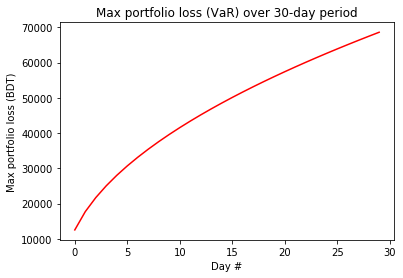

In [21]:
# Calculate n Day VaR
var_array = []
num_days = int(30)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (BDT)")
plt.title("Max portfolio loss (VaR) over 30-day period")
plt.plot(var_array, "r")

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


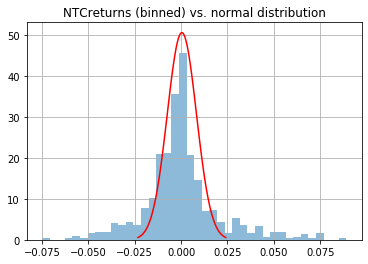

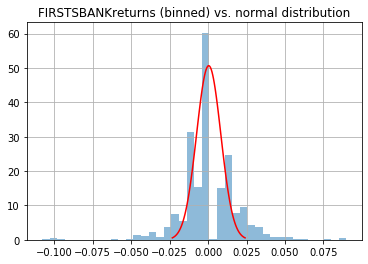

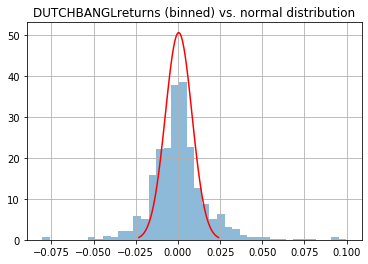

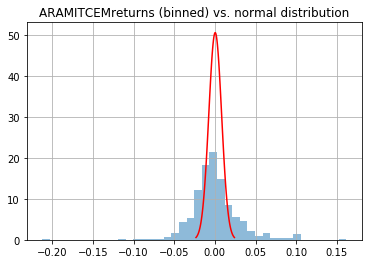

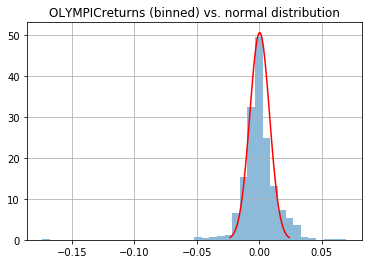

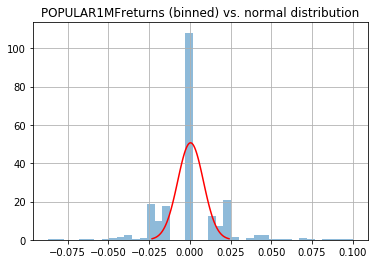

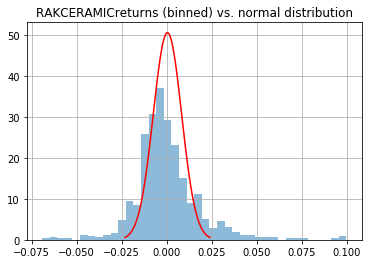

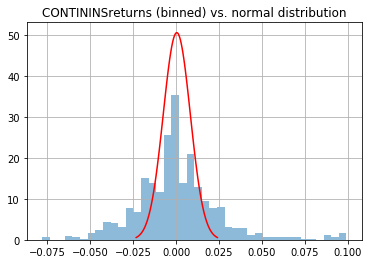

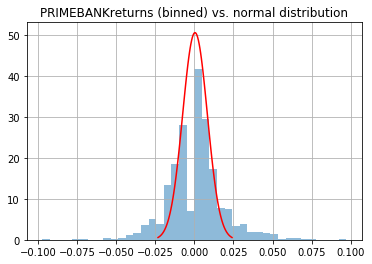

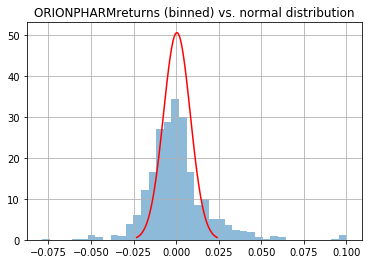

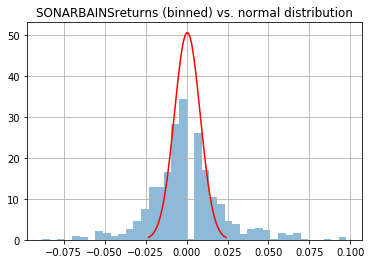

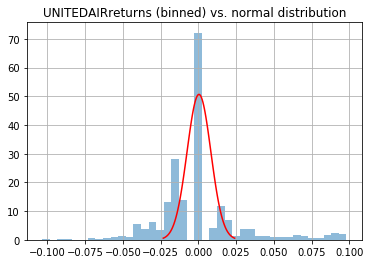

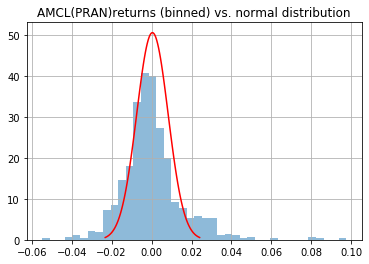

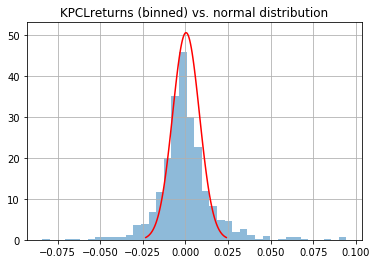

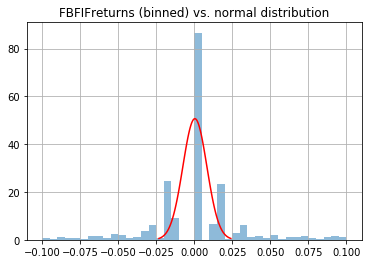

In [22]:
# Repeat for each equity in portfolio
for stock in tickers:
  returns[stock].hist(bins=40, normed=True,histtype="stepfilled",alpha=0.5)
  x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
  plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
  plt.title(stock + "returns (binned) vs. normal distribution")
  plt.show()